In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA


zoo_df = pd.read_csv("Zoo.csv")

print("First few rows of the dataset:")
display(zoo_df.head())



First few rows of the dataset:


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Visualize the distribution

<Figure size 1600x1200 with 0 Axes>

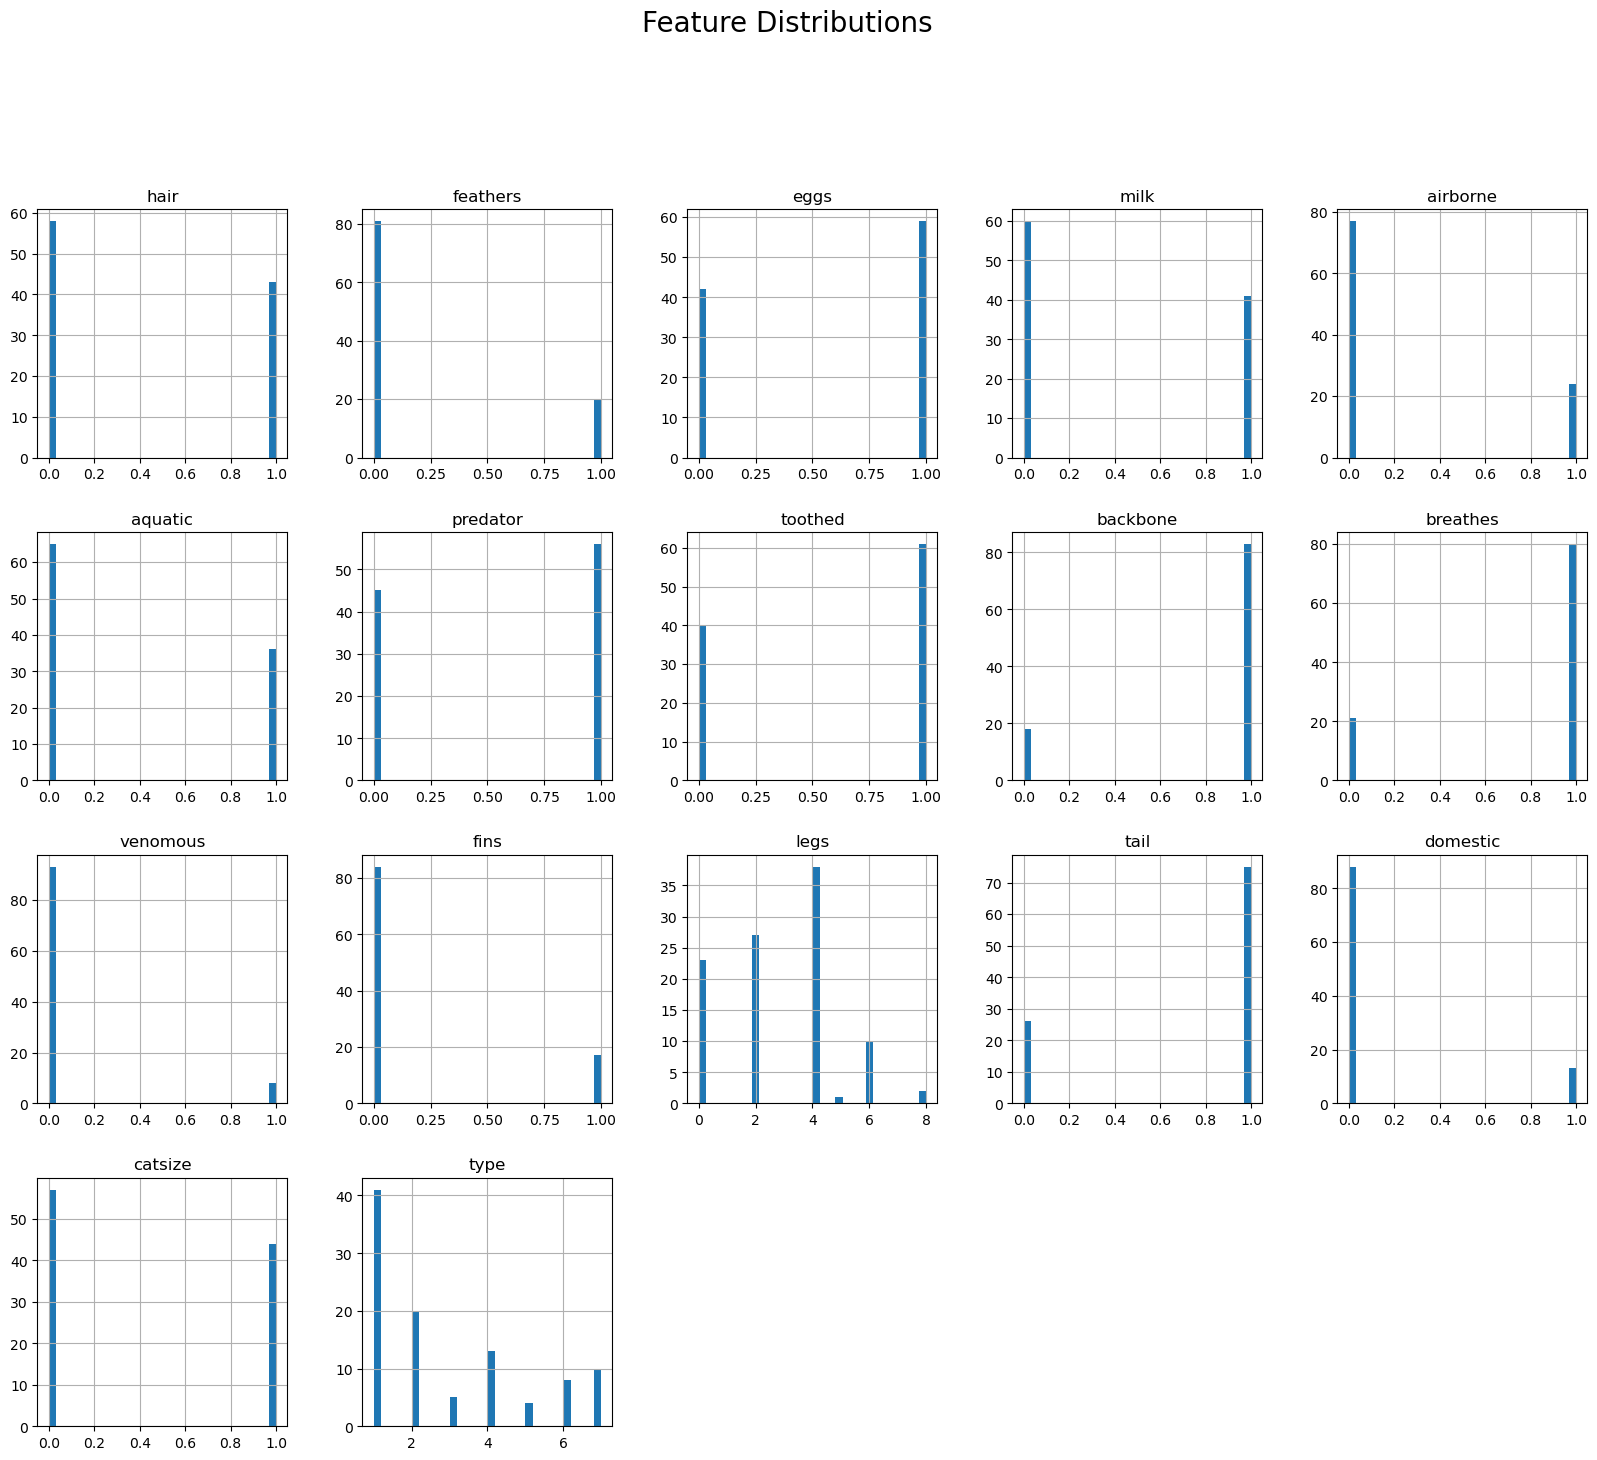

In [23]:

plt.figure(figsize=(16, 12))
zoo_df.hist(bins=30, figsize=(20, 20), layout=(5, 5))
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

# Visualize the target variable distribution

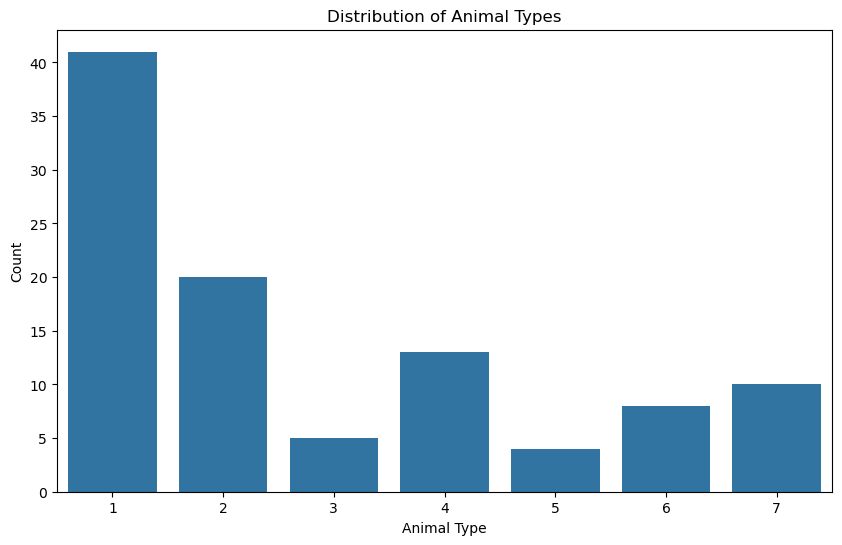

In [24]:

plt.figure(figsize=(10, 6))
sns.countplot(data=zoo_df, x='type')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# AnalyzeINg relationships between features and the target variable

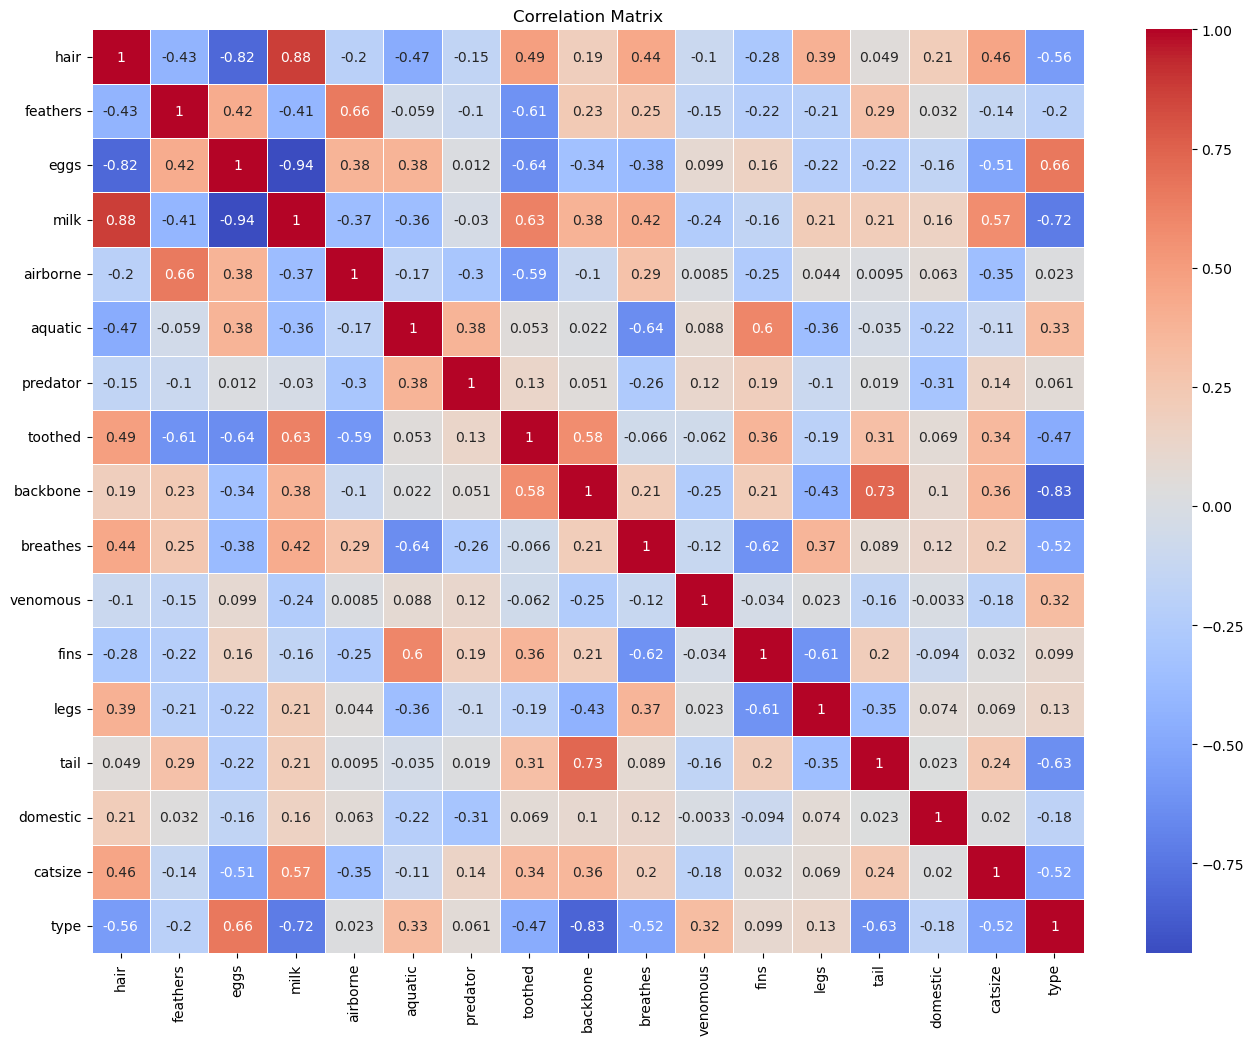

In [25]:

plt.figure(figsize=(16, 12))
sns.heatmap(zoo_df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Check for missing values

In [26]:

print("Checking for missing values:")
missing_values = zoo_df.isnull().sum()
print(missing_values)

Checking for missing values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


# Visualize outliers in the 'legs' feature using a box plot

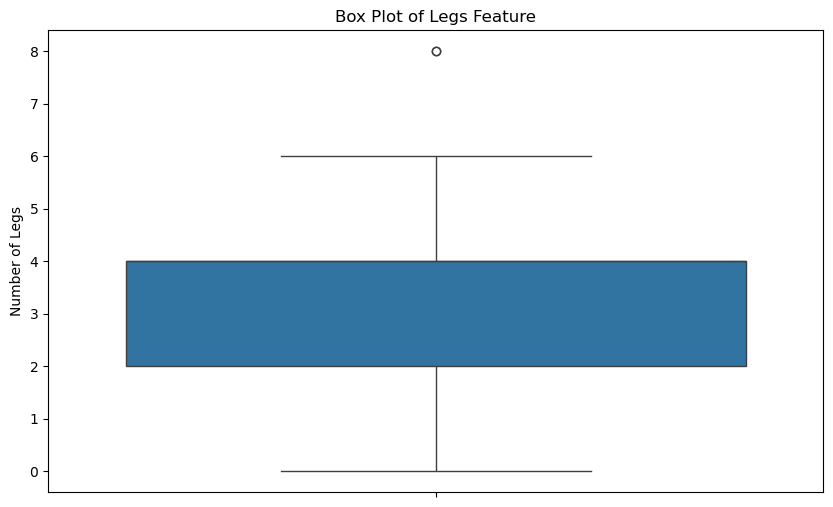

In [27]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=zoo_df, y='legs')
plt.title('Box Plot of Legs Feature')
plt.ylabel('Number of Legs')
plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)

In [28]:

X = zoo_df.drop(['animal name', 'type'], axis=1)
y = zoo_df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the K-Nearest Neighbours algorithm

In [29]:

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the classifier's performanc
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1-Score: 0.8957902001380263


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# We will use PCA for dimensionality reduction before plotting

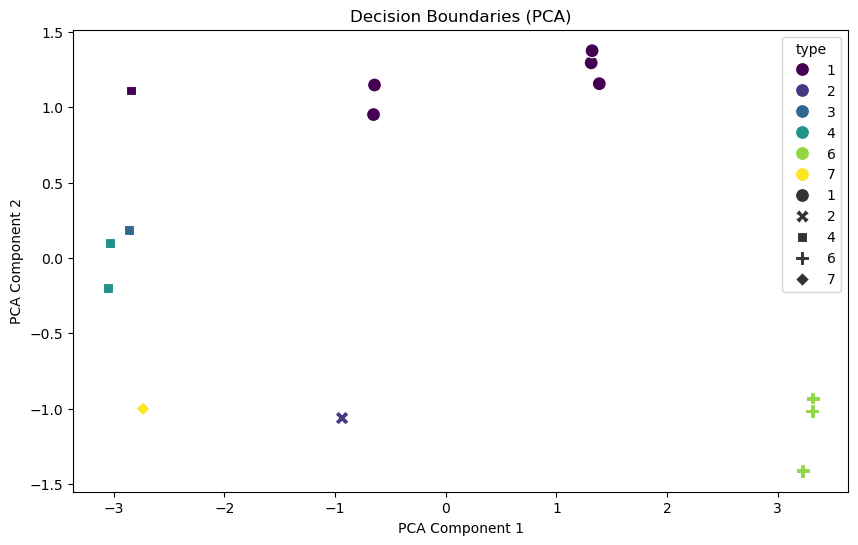

In [30]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, style=y_pred_pca, palette='viridis', s=100)
plt.title('Decision Boundaries (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
